**Общая информация**

**Срок сдачи:** 20 марта 2019, 06:00 <br\>
**Штраф за опоздание:** -1 балл после 06:00 20 марта, -2 балла после 06:00 27 марта, -3 балла после 06:00 3 апреля

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack скинуть ссылку в личный чат @alkhamush
Пример ссылки:
https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb 


Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_openml

from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial import distance
from operator import itemgetter
# %load_ext pycodestyle_magic

In [416]:
# %%pycodestyle
# metric : string or callable, default ‘minkowski’

class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    def __init__(self, n_neighbors, algorithm = 'brute'):
        self.n_neighbors = n_neighbors
        self.algorithm =  algorithm

    def fit(self, X, y): 
        if X.shape[0] != y.shape[0]:
            print("error")
            return
        self._X = np.array(X, dtype= np.float64)
        self._y = np.array(y, dtype= np.int32)
        self.n_classes = np.unique(y).shape[0]
        
    def neighbors(self, X):
        X = np.array(X, dtype= np.float64)
        distances = distance.cdist(X, self._X)
        indeces = np.argsort(distances, axis=1)
        ineighbors = indeces[:, :self.n_neighbors]
        return self._y[ineighbors]
    
    def votes(self, x):
        votes = np.zeros(self.n_classes)
        for i in x:
            votes[i] += 1
        return votes.argmax()
        
    def votes_proba(self, x):
        votes = np.zeros(self.n_classes)
        for i in x:
            votes[i] += 1
        return votes / self.n_neighbors
        
    def predict(self, X):
        result = self.neighbors(X)
        return np.apply_along_axis(lambda x: self.votes(x), 1, result)
    
    def predict_proba(self, X):
        result = self.neighbors(X)
        return np.apply_along_axis(lambda x: self.votes_proba(x), 1, result)
    
    def accuracy(self, y_true, y_pred):
        n = y_true.shape[0]
        return ((y_pred - y_true) == 0).sum() / n
    
    def score(self, X, y):
        y = np.array(y, dtype= np.int32)
        return self.accuracy(y, self.predict(X))

**IRIS**

In [195]:
iris = datasets.load_iris()

In [391]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [392]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [393]:
%time clf.fit(X_train, y_train)

CPU times: user 2.28 ms, sys: 0 ns, total: 2.28 ms
Wall time: 2 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [394]:
%time my_clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 262 µs, total: 262 µs
Wall time: 150 µs


In [395]:
%time clf.predict(X_test)

CPU times: user 294 µs, sys: 3.86 ms, total: 4.15 ms
Wall time: 3.25 ms


array([0, 2, 2, 2, 2, 0, 1, 1, 0, 0, 1, 1, 2, 1, 0])

In [401]:
%time my_clf.predict(X_test)

CPU times: user 2.76 ms, sys: 753 µs, total: 3.51 ms
Wall time: 2.19 ms


array([0, 2, 2, 2, 2, 0, 1, 1, 0, 0, 1, 1, 2, 1, 0])

In [404]:
%time clf.predict_proba(X_test)

CPU times: user 4.3 ms, sys: 81 µs, total: 4.38 ms
Wall time: 3.22 ms


array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [405]:
%time my_clf.predict_proba(X_test)

CPU times: user 2.97 ms, sys: 810 µs, total: 3.78 ms
Wall time: 2.23 ms


array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [406]:
clf.score(X_test, y_test)

1.0

In [407]:
my_clf.score(X_test, y_test)

1.0

Задание 3

[0.33333333 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333
 0.93333333 0.93333333 1.         0.93333333 1.         0.93333333
 1.         0.93333333 1.         1.         1.         1.
 1.         1.         1.         1.         1.         0.93333333
 1.         1.         1.         1.         1.         1.        ]
Best score with 8 neighbors
Best score: 1.0


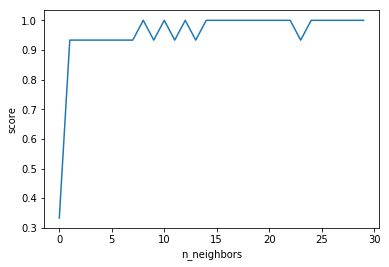

In [507]:
#%%pycodestyle

n_neighbors = 30
scores = np.empty(n_neighbors, dtype = np.float64)
X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    test_size=0.1,
                                                    stratify=iris.target)

for i in range(n_neighbors):
    my_clf = MyKNeighborsClassifier(n_neighbors = i)
    my_clf.fit(X_train, y_train)
    scores[i] = my_clf.score(X_test, y_test)
        
best_count = np.argmax(scores)
print(scores)
print("Best score with {} neighbors".format(best_count))
print("Best score: {}".format(np.max(scores)))
plt.plot(range(n_neighbors), scores)
plt.xlabel('n_neighbors')
plt.ylabel('score') 
plt.show()

**MNIST**

In [101]:
mnist = fetch_openml('mnist_784')

In [409]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [421]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [418]:
%time clf.fit(X_train, y_train)

CPU times: user 40.6 s, sys: 98 ms, total: 40.7 s
Wall time: 40.5 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [422]:
%time my_clf.fit(X_train, y_train)

CPU times: user 302 ms, sys: 202 ms, total: 504 ms
Wall time: 128 ms


In [368]:
%time clf.predict(X_test)

CPU times: user 2.88 s, sys: 292 ms, total: 3.17 s
Wall time: 1.17 s


array([1, 0, 7, 1, 4, 7, 9, 2, 7, 4, 2, 2, 8, 5, 6, 3, 2, 7, 8, 0, 0, 0,
       1, 6, 4, 0, 8, 0, 7, 7, 6, 6, 8, 4, 4, 8, 9, 6, 0, 0, 5, 4, 5, 5,
       4, 5, 8, 0, 2, 8, 2, 9, 2, 9, 4, 1, 8, 6, 6, 6, 1, 3, 4, 9, 2, 4,
       3, 4, 3, 0, 8, 9, 1, 9, 6, 2, 9, 7, 9, 1, 6, 9, 1, 3, 6, 4, 4, 0,
       6, 0, 5, 6, 8, 6, 7, 3, 4, 8, 8, 8, 4, 9, 3, 1, 2, 6, 5, 9, 0, 7,
       3, 7, 8, 4, 0, 0, 4, 5, 0, 3, 4, 5, 0, 0, 1, 8, 7, 9, 6, 4, 1, 9,
       9, 4, 9, 9, 8, 7, 3, 1, 0, 0, 4, 7, 6, 9, 1, 1, 4, 3, 3, 9, 1, 7,
       3, 9, 5, 0, 7, 4, 5, 5, 9, 2, 6, 6, 5, 2, 8, 7, 8, 9, 6, 8, 9, 5,
       7, 2, 0, 4, 7, 2, 9, 9, 3, 1, 8, 9, 2, 5, 5, 9, 8, 6, 6, 8, 7, 3,
       5, 9, 4, 3, 5, 3, 7, 2, 8, 4, 9, 9, 4, 0, 7, 3, 9, 2, 7, 9, 5, 5,
       3, 5, 1, 3, 4, 2, 3, 8, 8, 7, 1, 3, 4, 0, 4, 2, 0, 7, 0, 3, 1, 2,
       0, 3, 5, 1, 6, 5, 0, 2, 9, 5, 6, 9, 9, 1, 7, 0, 6, 7, 3, 4, 6, 6,
       1, 5, 7, 2, 8, 1, 3, 1, 7, 9, 7, 9, 7, 3, 6, 9, 3, 5, 9, 2, 1, 1,
       5, 2, 5, 5, 7, 8, 0, 2, 4, 1, 3, 4, 8, 1, 0,

In [412]:
%time my_clf.predict(X_test)

CPU times: user 29 s, sys: 243 ms, total: 29.2 s
Wall time: 28.6 s


array([7, 9, 8, 1, 3, 1, 9, 8, 7, 3, 4, 2, 1, 0, 4, 5, 7, 7, 1, 7, 3, 2,
       6, 5, 0, 9, 8, 2, 9, 3, 8, 1, 1, 2, 4, 7, 1, 4, 0, 5, 9, 2, 2, 1,
       1, 3, 1, 6, 3, 0, 5, 4, 3, 8, 2, 1, 7, 6, 8, 6, 7, 5, 9, 7, 4, 9,
       2, 4, 0, 4, 5, 2, 8, 0, 6, 8, 6, 3, 8, 4, 7, 9, 8, 9, 3, 0, 4, 4,
       7, 1, 7, 7, 0, 1, 0, 5, 1, 2, 8, 5, 9, 1, 7, 4, 5, 0, 0, 6, 2, 7,
       3, 8, 7, 1, 5, 1, 0, 1, 1, 3, 8, 5, 4, 5, 2, 7, 7, 8, 4, 0, 1, 0,
       9, 2, 4, 5, 1, 4, 1, 0, 7, 7, 5, 8, 4, 8, 2, 7, 4, 7, 5, 5, 9, 8,
       4, 2, 4, 9, 4, 2, 2, 3, 4, 6, 3, 5, 8, 7, 2, 2, 4, 4, 8, 3, 1, 3,
       6, 3, 6, 5, 7, 3, 7, 7, 8, 1, 6, 3, 6, 6, 2, 2, 2, 0, 3, 4, 3, 0,
       9, 3, 4, 8, 4, 5, 3, 9, 9, 9, 0, 0, 4, 6, 2, 9, 4, 7, 8, 2, 8, 2,
       4, 2, 6, 9, 8, 1, 1, 6, 7, 5, 8, 3, 3, 7, 6, 2, 0, 2, 9, 6, 8, 8,
       7, 6, 8, 2, 1, 4, 5, 1, 2, 8, 6, 9, 8, 8, 4, 2, 5, 2, 3, 9, 6, 5,
       3, 7, 9, 3, 3, 0, 4, 7, 1, 7, 7, 2, 1, 2, 8, 8, 4, 9, 6, 4, 4, 1,
       6, 3, 2, 6, 6, 0, 3, 9, 1, 9, 8, 4, 9, 2, 5,

In [ ]:
%time clf.predict_proba(X_test)

In [413]:
%time my_clf.predict_proba(X_test)

CPU times: user 32.1 s, sys: 342 ms, total: 32.5 s
Wall time: 31.9 s


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [419]:
clf.score(X_test, y_test)

0.98

In [423]:
my_clf.score(X_test, y_test)

0.98

Задание 4

In [ ]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [ ]:
%time clf.fit(X_train, y_train)

In [ ]:
%time my_clf.fit(X_train, y_train)

In [ ]:
%time clf.predict(X_test)

In [ ]:
%time my_clf.predict(X_test)

In [ ]:
%time clf.predict_proba(X_test)

In [ ]:
%time my_clf.predict_proba(X_test)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
my_clf.score(X_test, y_test)

Задание 5

In [ ]:
# seaborn
# matplotlib
# train_test_split
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline)
# StandardScaler (from sklearn.preprocessing import StandardScaler)
# ClassifierMixin
# NeighborsBase
# KNeighborsMixin
# SupervisedIntegerMixin